<a href="https://colab.research.google.com/github/saurabhmittal1/big_mart_sales_prediction/blob/master/big_mart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
pip install catboost

     |████████████████████████████████| 66.1MB 57kB/s 


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split,GridSearchCV

#Importing Machine Learning Model
from catboost import CatBoostRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

#statistical Tools
from sklearn import metrics

#To tranform data
from sklearn import preprocessing

#Setting Format
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.random.seed(100)

# Importing Data

In [3]:
train = pd.read_csv("/content/drive/My Drive/Dataset/Big Mart Sales/Big Mart Sales.csv")
test = pd.read_csv("/content/drive/My Drive/Dataset/Big Mart Sales/Test.csv")

In [4]:
data = pd.concat([train,test],ignore_index=True)
data.shape

(14204, 12)

In [5]:
print(train.shape,test.shape)
print(train.shape[0]+test.shape[0])

(8523, 12) (5681, 11)
14204


In [6]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14194,FDA01,15.00,reg,0.054463,Canned,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
14195,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
14196,FDF46,7.07,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14197,DRL35,15.70,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14198,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.50,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


# Explorative Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,14204,1559,NCK53,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,11765,NaN,NaN,NaN,12.7929,4.6525,4.555,8.71,12.6,16.75,21.35
Item_Fat_Content,14204,5,Low Fat,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,14204,NaN,NaN,NaN,0.0659528,0.0514586,0,0.0270357,0.0540205,0.0940373,0.328391
Item_Type,14204,16,Fruits and Vegetables,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,14204,NaN,NaN,NaN,141.005,62.0869,31.29,94.012,142.247,185.856,266.888
Outlet_Identifier,14204,10,OUT027,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,14204,NaN,NaN,NaN,1997.83,8.37166,1985,1987,1999,2004,2009
Outlet_Size,10188,3,Medium,4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,14204,3,Tier 3,5583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets Look at all the unique values in Columns

In [9]:
#Extracting the unique values of each columns

for i in data.columns:
    print(i," : distinct_value")
    print(data[i].nunique(), ":No of unique values")
    print(data[i].unique())
    print("-"*30)
    print("")

Item_Identifier  : distinct_value
1559 :No of unique values
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
------------------------------

Item_Weight  : distinct_value
415 :No of unique values
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5

# Univariate Analysis

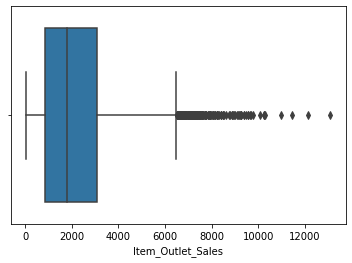

In [10]:
sns.boxplot(train.Item_Outlet_Sales)

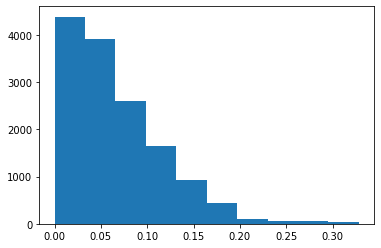

In [11]:
plt.hist(data.Item_Visibility, bins=10)
plt.show()

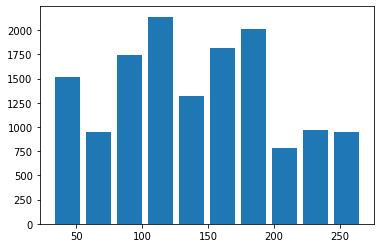

In [12]:
plt.hist(data.Item_MRP, bins=10, rwidth=.8)
plt.show()

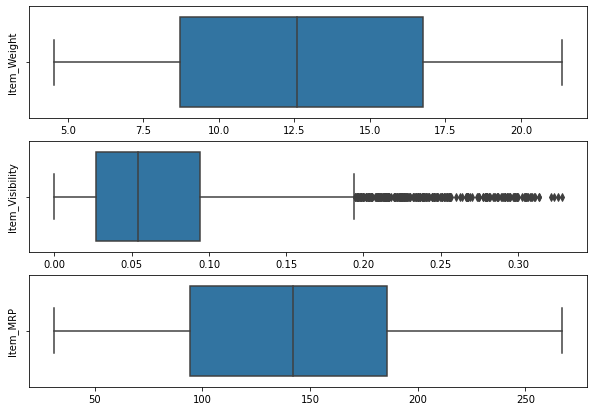

In [13]:
plt.figure(figsize=(10,7))
for i, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    plt.subplot(3,1,i+1)
    sns.boxplot(data[col])
    plt.xlabel('')
    plt.ylabel(col)

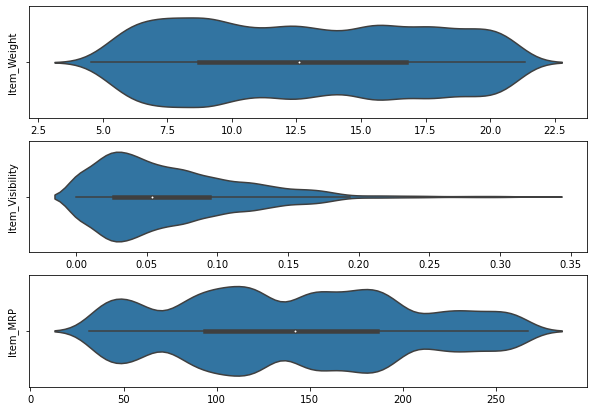

In [14]:
plt.figure(figsize=(10,7))
for i, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    plt.subplot(3,1,i+1)
    sns.violinplot(data[col])
    plt.xlabel('')
    plt.ylabel(col)

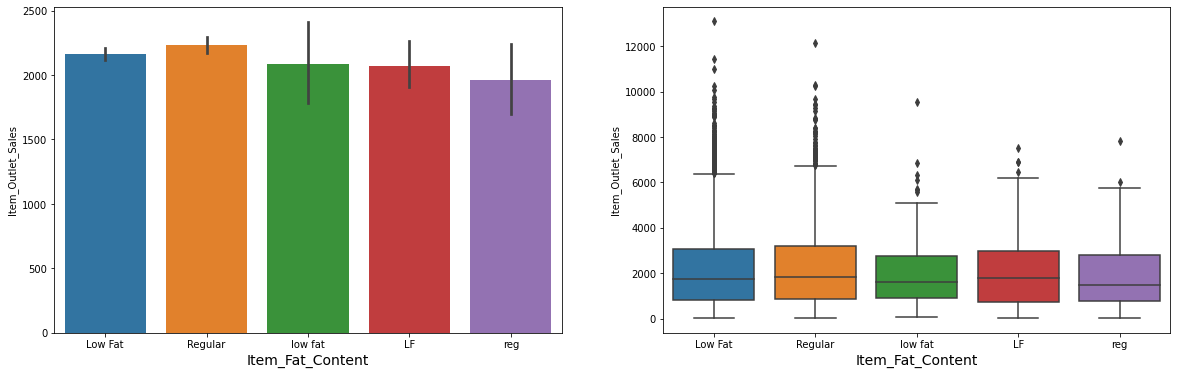

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data=data, y='Item_Outlet_Sales', x='Item_Fat_Content')
plt.xlabel('Item_Fat_Content', fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(data=data, y='Item_Outlet_Sales', x='Item_Fat_Content')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

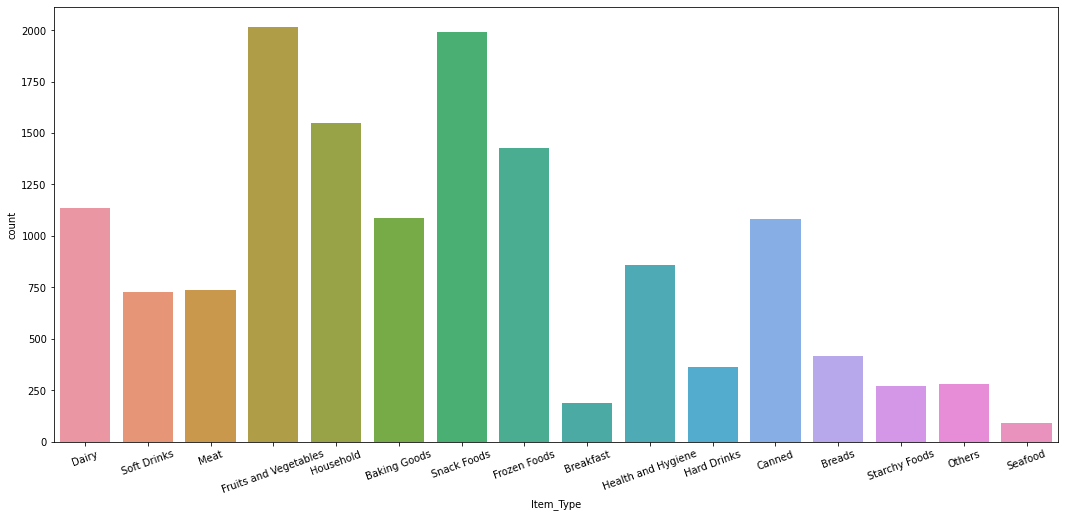

In [16]:
plt.figure(figsize=(18,8))
sns.countplot(data.Item_Type)
plt.xticks(rotation=20)
plt.show()

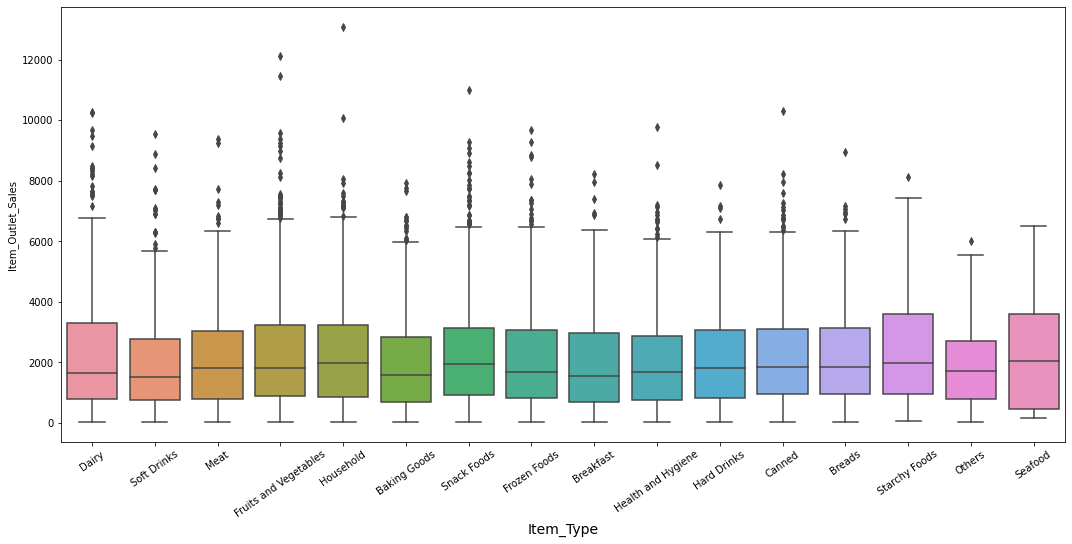

In [17]:
plt.figure(figsize=(18,8))
sns.boxplot(data=data, y='Item_Outlet_Sales', x='Item_Type')
plt.xlabel('Item_Type', fontsize=14)
plt.xticks(rotation=35)
plt.show()

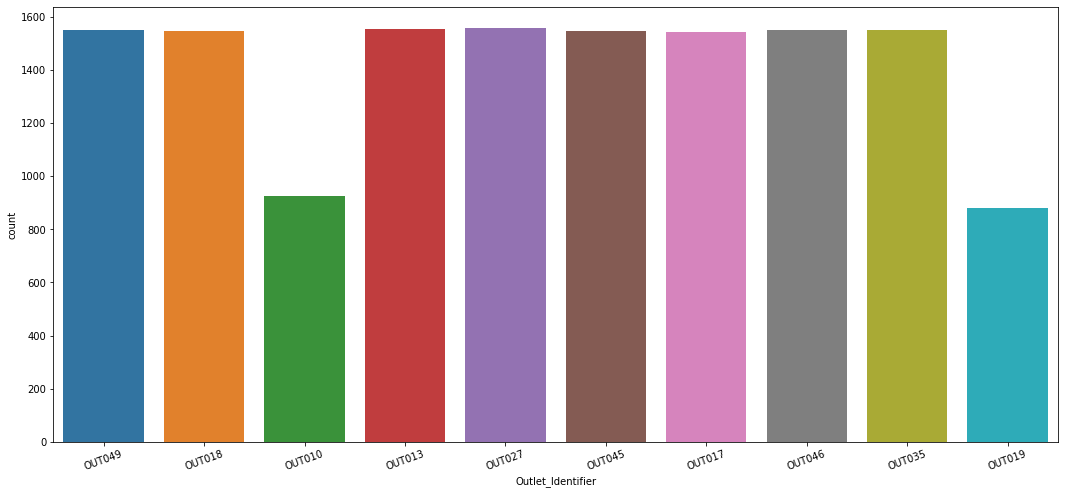

In [18]:
plt.figure(figsize=(18,8))
sns.countplot(data.Outlet_Identifier)
plt.xticks(rotation=20)
plt.show()

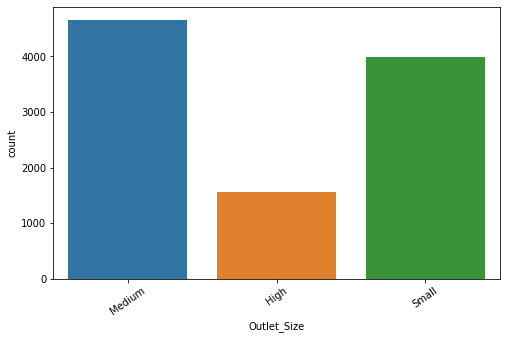

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data.Outlet_Size)
plt.xticks(rotation=35)
plt.show()

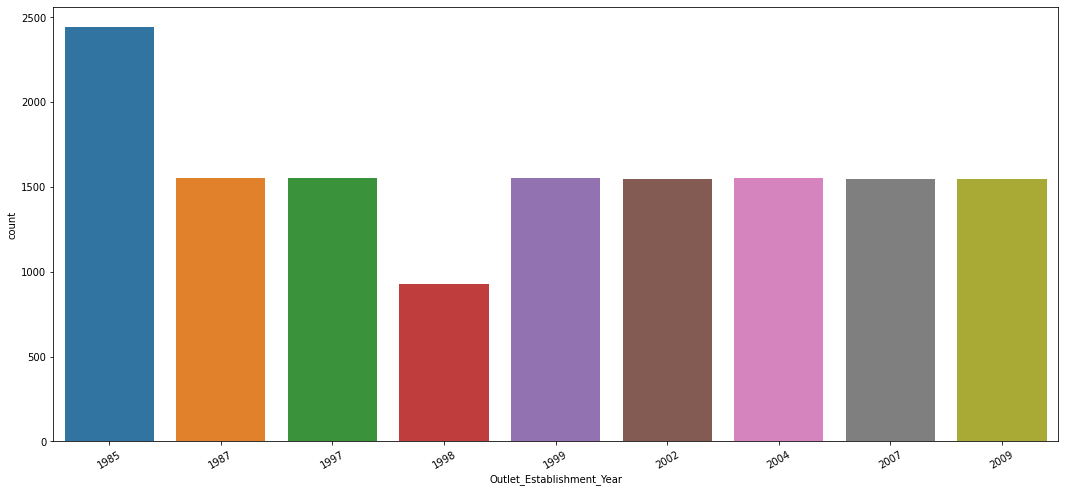

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(data.Outlet_Establishment_Year)
plt.xticks(rotation=30)
plt.show()

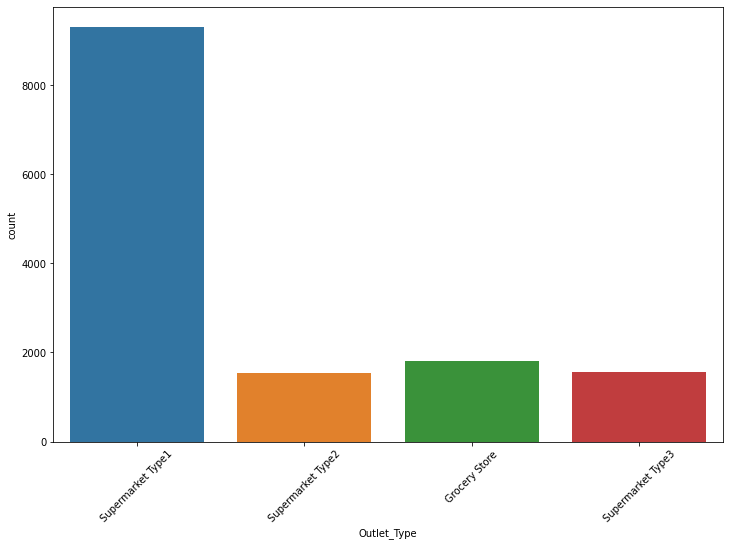

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=45)
plt.show()

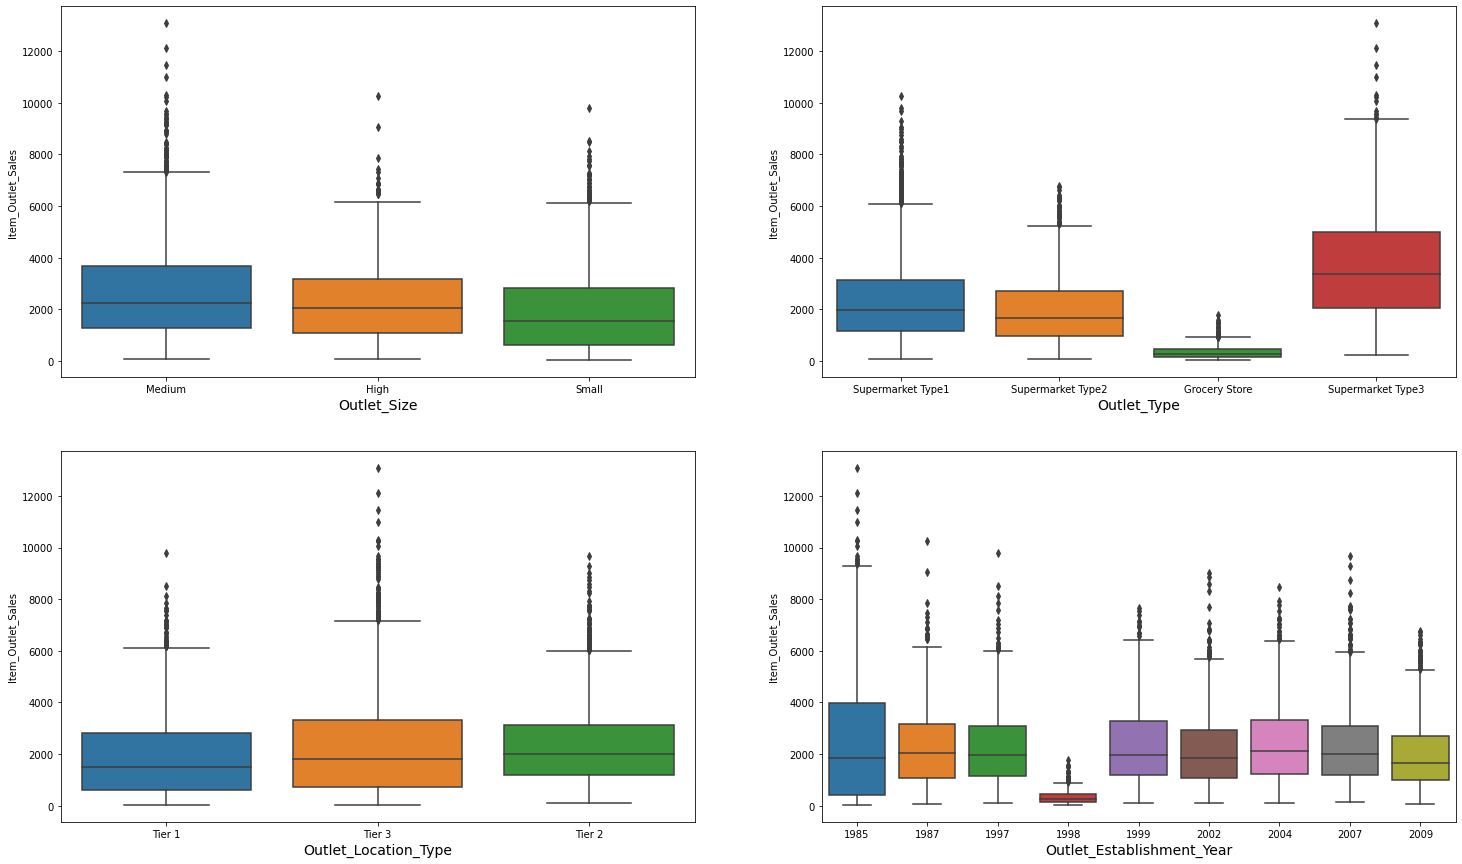

In [22]:
plt.figure(figsize=(25,15))
outlet_col = [ 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type','Outlet_Establishment_Year']
for i, col in enumerate(outlet_col):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=data, y='Item_Outlet_Sales', x=col)
    plt.xlabel(col, fontsize=14)

# Bivariate

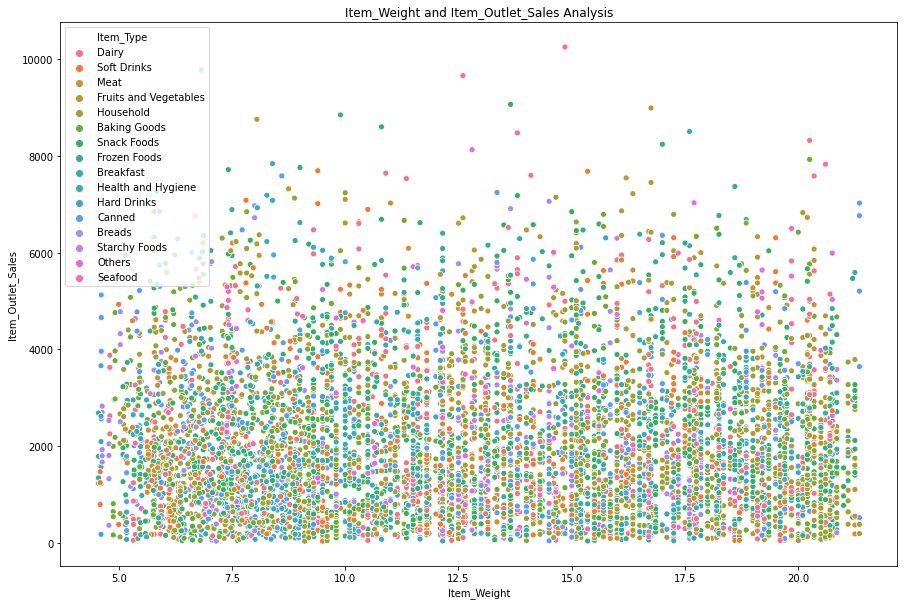

In [23]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
sns.scatterplot(data.Item_Weight, data.Item_Outlet_Sales, hue=data.Item_Type)

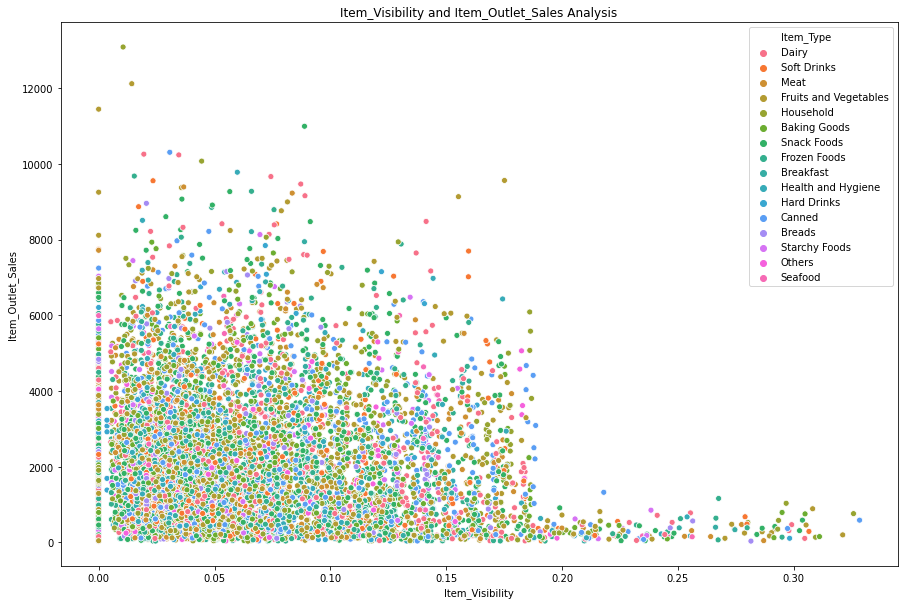

In [24]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
sns.scatterplot(data.Item_Visibility, data.Item_Outlet_Sales, hue=data.Item_Type)

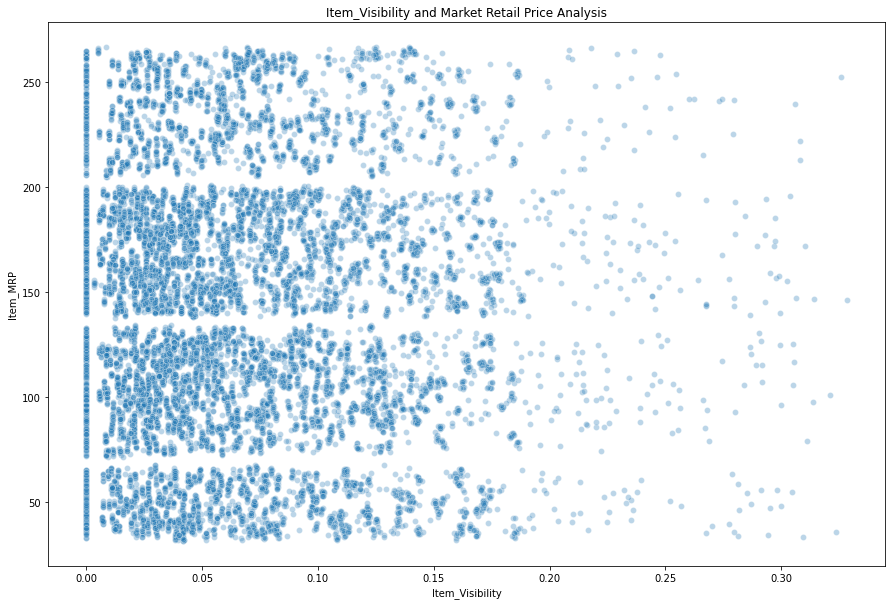

In [25]:
plt.figure(figsize=(15,10))
plt.xlabel("Item_Visibility")
plt.ylabel("Market Retail Price")
plt.title("Item_Visibility and Market Retail Price Analysis")
sns.scatterplot(data.Item_Visibility, data.Item_MRP, alpha=0.3)

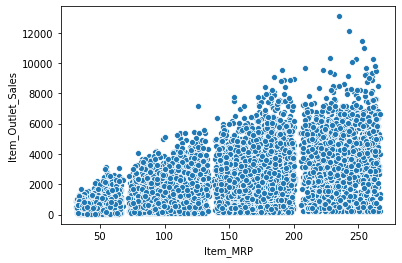

In [26]:
sns.scatterplot(data.Item_MRP, data.Item_Outlet_Sales)

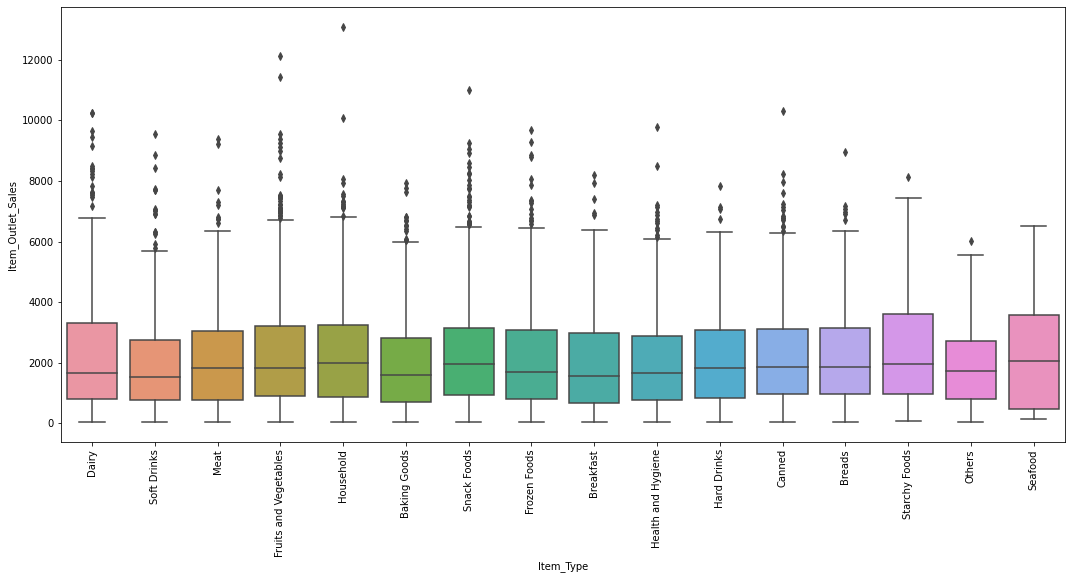

In [27]:
plt.figure(figsize=(18,8))
sns.boxplot(data.Item_Type, data.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

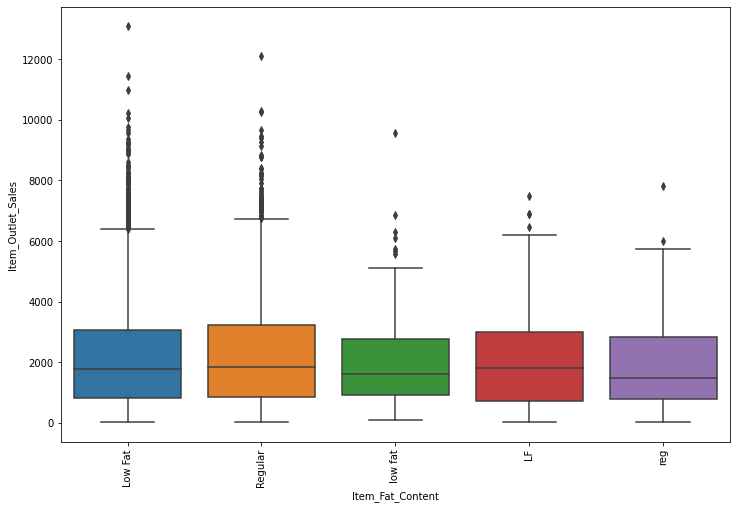

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data.Item_Fat_Content, data.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

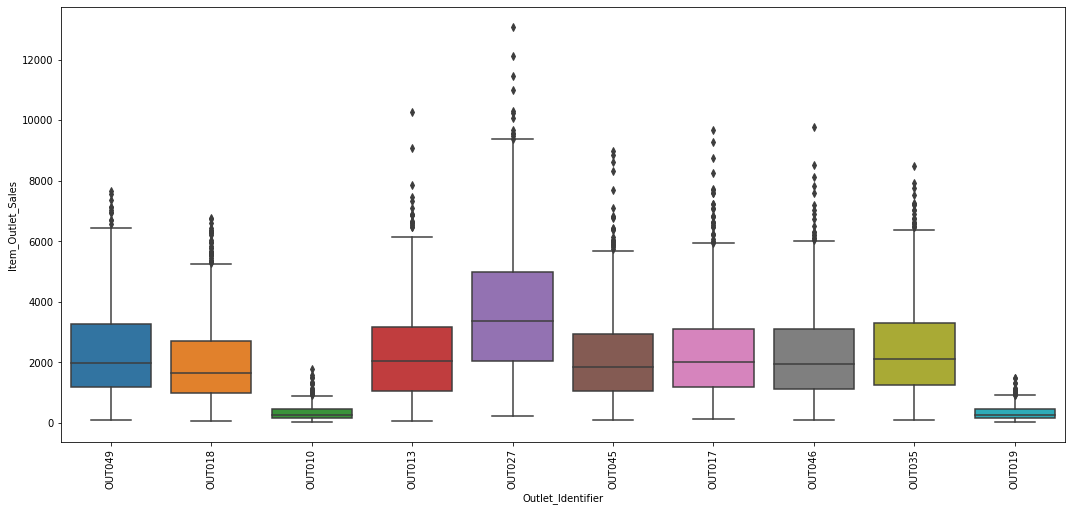

In [29]:
plt.figure(figsize=(18,8))
sns.boxplot(data.Outlet_Identifier, data.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

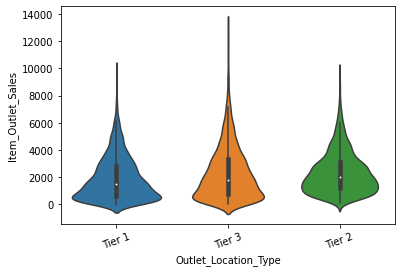

In [30]:
sns.violinplot(data.Outlet_Location_Type, data.Item_Outlet_Sales)
plt.xticks(rotation=20)
plt.show()

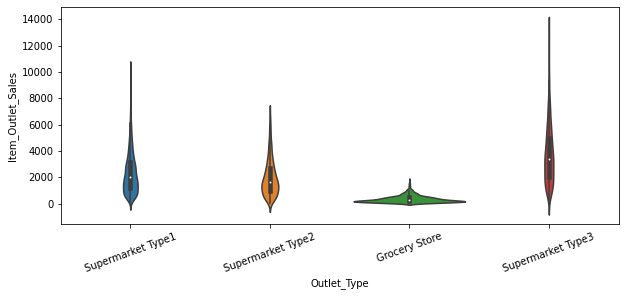

In [31]:
plt.figure(figsize=(10,4))
sns.violinplot(data.Outlet_Type, data.Item_Outlet_Sales)
plt.xticks(rotation=20)
plt.show()

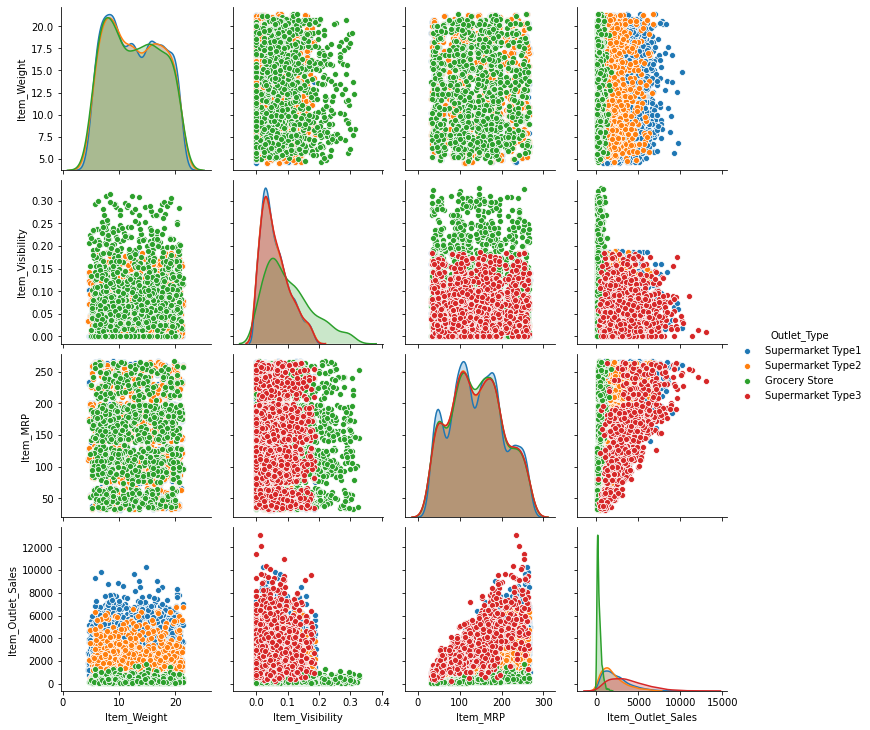

In [32]:
sns.pairplot(data.drop(columns='Outlet_Establishment_Year'), hue='Outlet_Type')

# Finding Missing Values

In [33]:
#We can see that we have some data missing

round(100*(data.isna().sum())/len(data), 2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.27
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales            40.00
dtype: float64

In [34]:
#Looking for any '0' Values
data[data==0].sum()

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

1. Filling the mssing data in Item_weight with mean
2. Because every item should have some weight


In [35]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [36]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Correlation

In [37]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013641,0.033002,0.000462,0.011083
Item_Visibility,-0.013641,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.033002,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000462,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.011083,-0.128625,0.567574,-0.049135,1.000000


In [38]:
#Checking the Correlation between data with respect to target

data.corr()['Item_Outlet_Sales']

Item_Weight                  0.011083
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Correlation between different attributes')

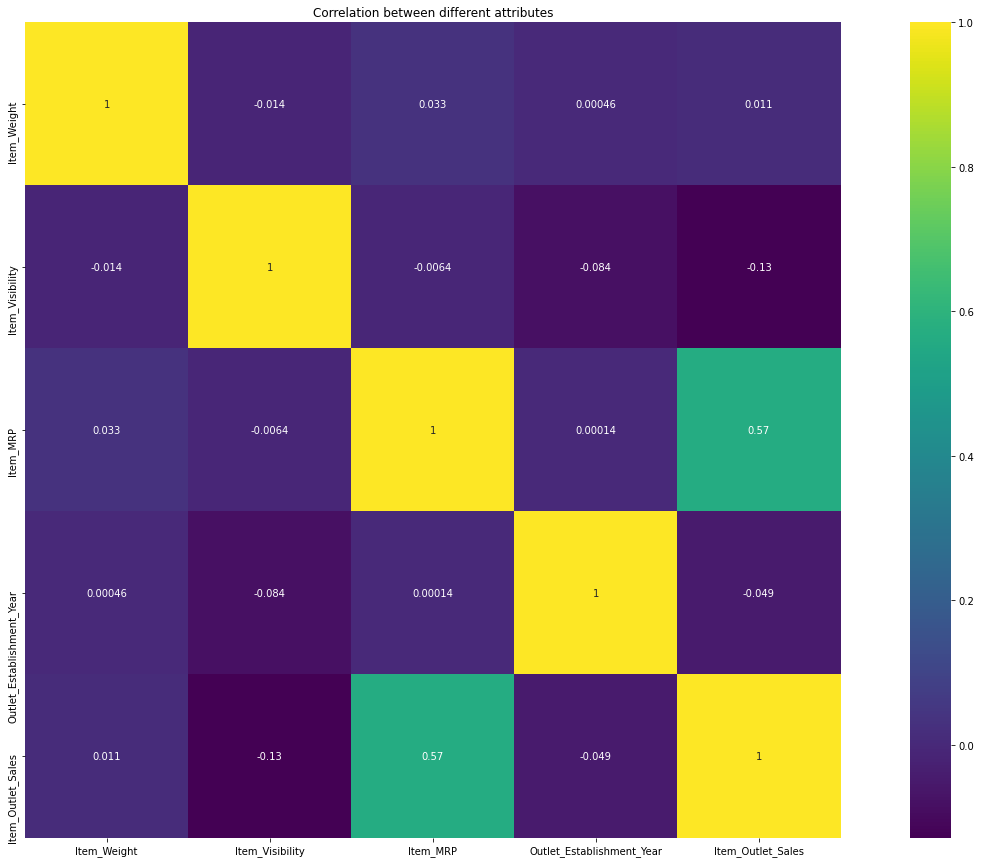

In [39]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation between different attributes")

In [40]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Transform Data

In [41]:
item_visiblity_avg = data.pivot_table( index = 'Item_Identifier', values = 'Item_Visibility')
item_visiblity_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [42]:
data['Item_visiblity_avg'] = data.apply(lambda x: x['Item_Visibility']/item_visiblity_avg['Item_Visibility'][item_visiblity_avg.index==x['Item_Identifier']][0], axis=1).astype(float)

In [43]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_visiblity_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.000000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000


In [44]:
data['Item_Visibility'], _ = stats.boxcox(data['Item_Visibility'] + 1)

In [45]:
stats.probplot(data['Item_Visibility'], dist=stats.norm)

((array([-3.89649086, -3.6760221 , -3.55519365, ...,  3.55519365,
          3.6760221 ,  3.89649086]),
  array([0.        , 0.        , 0.        , ..., 0.10453758, 0.10467611,
         0.10484188])),
 (0.02442956647025639, 0.04322486380742066, 0.989597301481592))

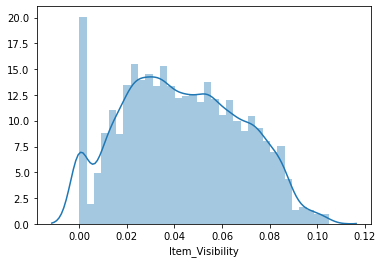

In [46]:
sns.distplot(data['Item_Visibility'])

In [47]:
'''def item_visibilty(x):
    if x <= 0.05:
        return 0
    elif x > 0.05 and x <=0.10:
        return 1
    elif x > 0.10 and x <=0.20:
        return 2
    else:
        return 3
    
data['Item_Visibility'] = data.Item_Visibility.apply(item_visibilty)'''

"def item_visibilty(x):\n    if x <= 0.05:\n        return 0\n    elif x > 0.05 and x <=0.10:\n        return 1\n    elif x > 0.10 and x <=0.20:\n        return 2\n    else:\n        return 3\n    \ndata['Item_Visibility'] = data.Item_Visibility.apply(item_visibilty)"

In [48]:
'''

We saw that in Item_identifier 1st 2 character's are common and other characters describes about the product

So we can extract those characters to simplify our dataset

'''

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [49]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_visiblity_avg,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.014862,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.931078,FD
1,DRC01,5.92,Regular,0.017586,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.933420,DR
2,FDN15,17.50,Low Fat,0.015470,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.960069,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.000000,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000,NC


Rearranging the Columns To get the better view of data

In [50]:
columns = ['Item_Identifier', 'Item_Type_Combined','Item_Type', 'Item_Fat_Content', 'Item_Weight', 'Item_Visibility',
        'Item_visiblity_avg', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
data = data[columns]
data.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,Dairy,Low Fat,9.30,0.014862,0.931078,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,Soft Drinks,Regular,5.92,0.017586,0.933420,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,Meat,Low Fat,17.50,0.015470,0.960069,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,Fruits and Vegetables,Regular,19.20,0.000000,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,NC,Household,Low Fat,8.93,0.000000,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Type_Combined Item_Type                               
DR                 Dairy                       2.451782e+05
                   Hard Drinks                 4.577934e+05
                   Soft Drinks                 8.928977e+05
FD                 Baking Goods                1.265525e+06
                   Breads                      5.532372e+05
                   Breakfast                   2.322990e+05
                   Canned                      1.444151e+06
                   Dairy                       1.277416e+06
                   Frozen Foods                1.825735e+06
                   Fruits and Vegetables       2.820060e+06
                   Meat                        9.175656e+05
                   Seafood                     1.488682e+05
                   Snack Foods                 2.732786e+06
                   Starchy Foods               3.514013e+05
NC                 Health and Hygiene          1.045200e+06
                   Household                   2.055494e+06
                   Others                      3.255176e+05

After we extract 1st 2 characters from Item_identifier we saw that it means to certain item type
Now, we can rename them accordingly

In [52]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [53]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

We saw that Outlet_size have some Nan Values Lets fill them with 'Not_specified' for now. We will work later for it.

In [54]:
data['Outlet_Size'] = data['Outlet_Size'].fillna('Not_specified')
data['Outlet_Size'].value_counts()

Medium           4655
Not_specified    4016
Small            3980
High             1553
Name: Outlet_Size, dtype: int64

In [55]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

After looking closely we get that ["LF"," Low Fat"," low fat"] & ["Regular","reg"] are same and just acronyms

In [56]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF','Low Fat')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat','Low Fat')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')

data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [57]:
data.pivot_table(values="Item_Outlet_Sales",index=['Outlet_Location_Type','Outlet_Size','Outlet_Type'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Location_Type Outlet_Size   Outlet_Type                         
Tier 1               Medium        Supermarket Type1       2.183970e+06
                     Small         Grocery Store           1.796941e+05
                                   Supermarket Type1       2.118395e+06
Tier 2               Not_specified Supermarket Type1       4.204191e+06
                     Small         Supermarket Type1       2.268123e+06
Tier 3               High          Supermarket Type1       2.142664e+06
                     Medium        Supermarket Type2       1.851823e+06
                                   Supermarket Type3       3.453926e+06
                     Not_specified Grocery Store           1.883402e+05

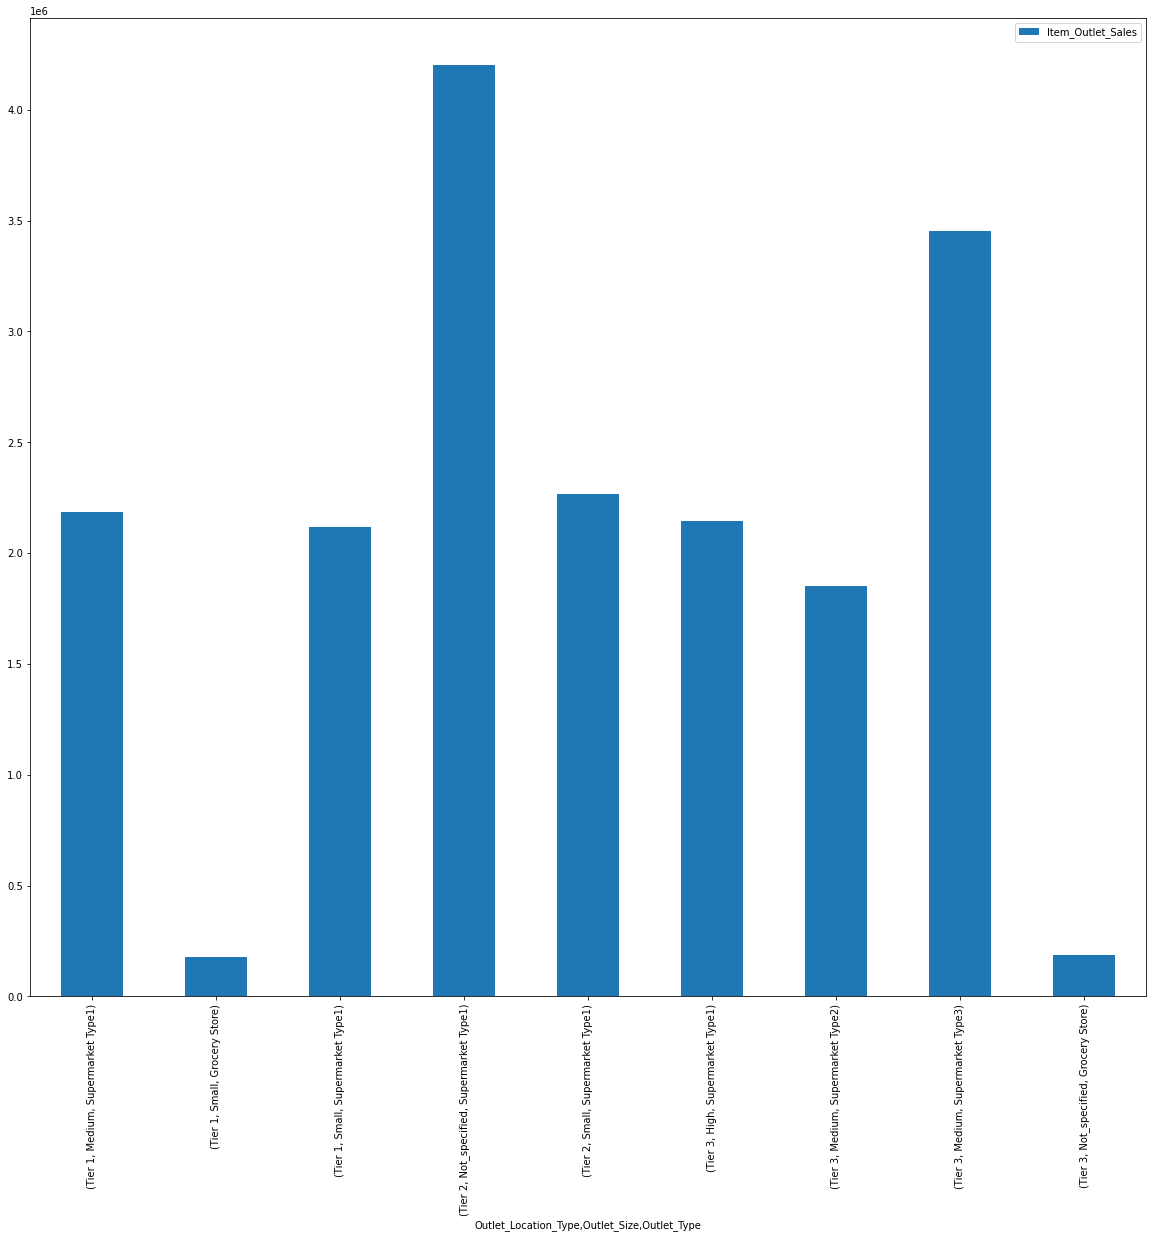

In [58]:
plot_outlet = data.pivot_table(values="Item_Outlet_Sales",index=['Outlet_Location_Type','Outlet_Size','Outlet_Type'],aggfunc=np.sum)
plot_outlet.plot(kind='bar',figsize = (20,18))
plt.xticks(rotation=90)
plt.show()

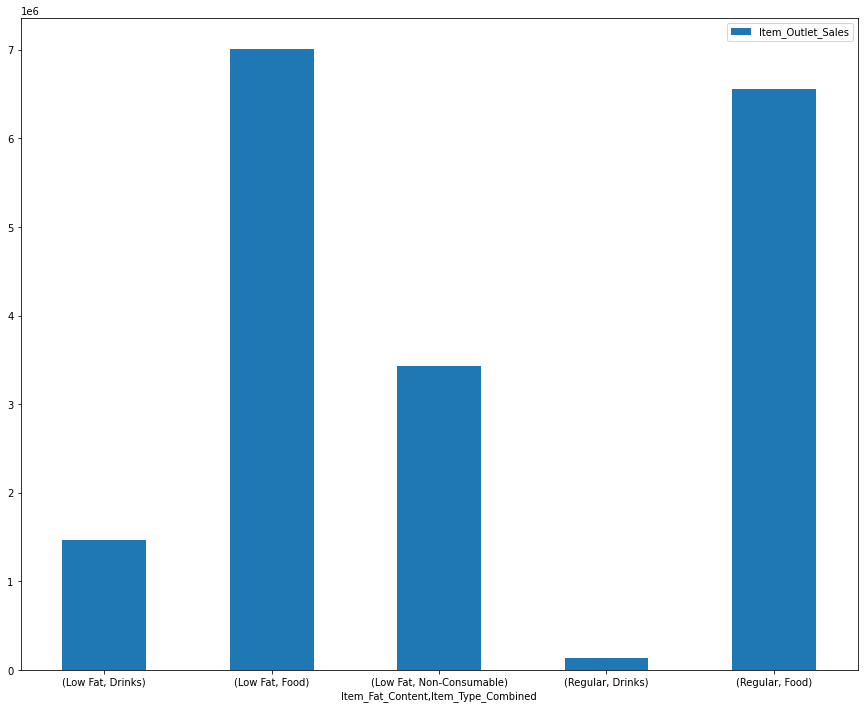

In [59]:
plot_item = data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined'],aggfunc='sum')
plot_item.plot(kind='bar',figsize = (15,12))
plt.xticks(rotation=0)
plt.show()

In [60]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Fat_Content Item_Type_Combined Item_Type                               
Low Fat          Drinks             Dairy                       2.451782e+05
                                    Hard Drinks                 4.577934e+05
                                    Soft Drinks                 7.612591e+05
                 Food               Baking Goods                5.805237e+05
                                    Breads                      3.056808e+05
                                    Breakfast                   9.944189e+04
                                    Canned                      7.531716e+05
                                    Dairy                       6.515046e+05
                                    Frozen Foods                9.528910e+05
                                    Fruits and Vegetables       1.374916e+06
                                    Meat                        3.460549e+05
                                    Seafood                     7.058812e+04
                                    Snack Foods                 1.669089e+06
                                    Starchy Foods               2.097909e+05
                 Non-Consumable     Health and Hygiene          1.045200e+06
                                    Household                   2.055494e+06
                                    Others                      3.255176e+05
Regular          Drinks             Soft Drinks                 1.316386e+05
                 Food               Baking Goods                6.850017e+05
                                    Breads                      2.475564e+05
                                    Breakfast                   1.328571e+05
                                    Canned                      6.909799e+05
                                    Dairy                       6.259113e+05
                                    Frozen Foods                8.728438e+05
                                    Fruits and Vegetables       1.445144e+06
                                    Meat                        5.715107e+05
                                    Seafood                     7.828010e+04
                                    Snack Foods                 1.063697e+06
                                    Starchy Foods               1.416103e+05

From above table we saw that Non_Consumable goods don't fit with Low_Fat.
So lets change them accordingly
Products looks like Household Items and lets it to Household

In [61]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Household"

In [62]:
plot_identifier = data.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.sum)
plot_identifier

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


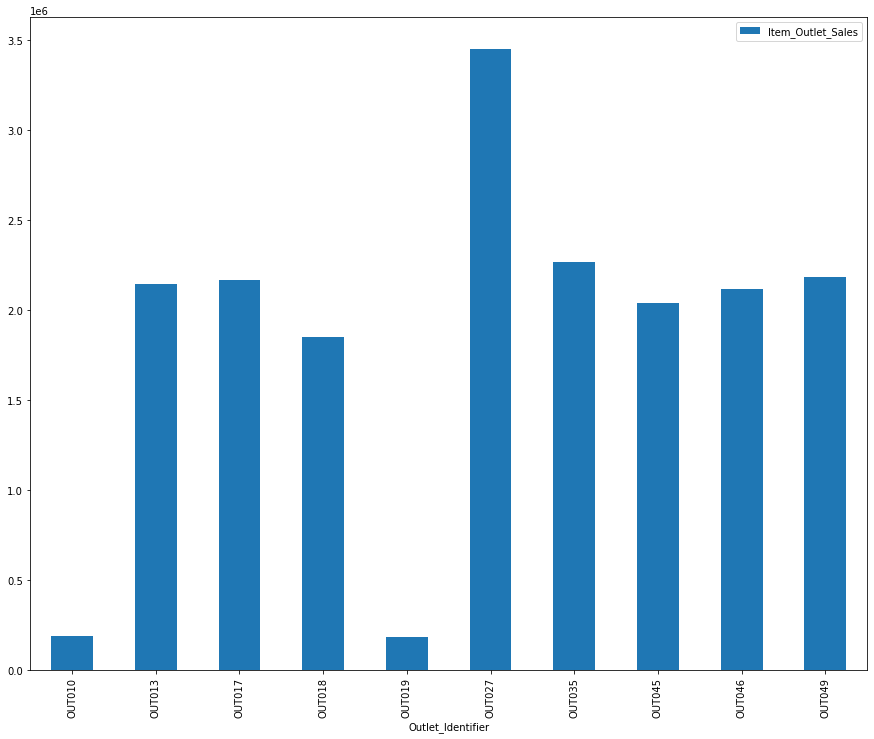

In [63]:
plot_identifier.plot(kind='bar',figsize = (15,12))
plt.show()

In [64]:
data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Size   Outlet_Identifier                   
Grocery Store     Tier 1               Small         OUT019                  1.796941e+05
                  Tier 3               Not_specified OUT010                  1.883402e+05
Supermarket Type1 Tier 1               Medium        OUT049                  2.183970e+06
                                       Small         OUT046                  2.118395e+06
                  Tier 2               Not_specified OUT017                  2.167465e+06
                                                     OUT045                  2.036725e+06
                                       Small         OUT035                  2.268123e+06
                  Tier 3               High          OUT013                  2.142664e+06
Supermarket Type2 Tier 3               Medium        OUT018                  1.851823e+06
Supermarket Type3 Tier 3               Medium        OUT027                  3.453926e+06

In [65]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [66]:
data.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

1. When we look Closely Grocery Store have the Lowest Sales
2. Supermarket Type3 have the Highest sale

After Carefully analyzing Outlet_size and Outlet_Identifier with Sales and Total Number of each Outlet_Identifier I think some Outlet_Identifier are in wrong Outlet_Size lets fix them

In [67]:
data.loc[data['Outlet_Identifier']=="OUT010",'Outlet_Size'] = "Small"

data.loc[data['Outlet_Identifier']=="OUT019",'Outlet_Size'] = "Small"

data.loc[data['Outlet_Identifier']=="OUT027",'Outlet_Size'] = "High"

data.loc[data['Outlet_Identifier']=="OUT017",'Outlet_Size'] = "High"

data.loc[data['Outlet_Identifier']=="OUT045",'Outlet_Size'] = "High"

data.loc[data['Outlet_Identifier']=="OUT035",'Outlet_Size'] = "Medium"

data.loc[data['Outlet_Identifier']=="OUT046",'Outlet_Size'] = "Medium"

In [68]:
data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Size','Outlet_Identifier'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Size Outlet_Identifier                   
High        OUT013                  2.142664e+06
            OUT017                  2.167465e+06
            OUT027                  3.453926e+06
            OUT045                  2.036725e+06
Medium      OUT018                  1.851823e+06
            OUT035                  2.268123e+06
            OUT046                  2.118395e+06
            OUT049                  2.183970e+06
Small       OUT010                  1.883402e+05
            OUT019                  1.796941e+05

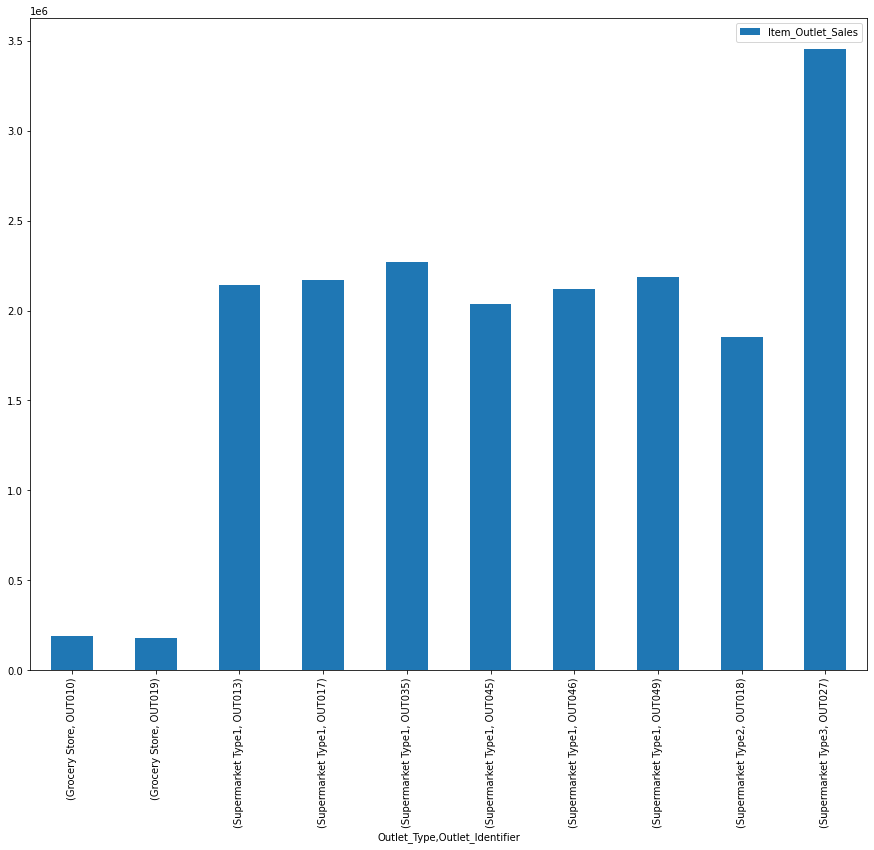

In [69]:
data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Type','Outlet_Identifier'],aggfunc=np.sum).plot(kind='bar',figsize = (15,12))
plt.show()

# Let's Create New Columns

In [70]:
perishable = ["Breads", "Breakfast", "Dairy", "Snack Foods",
               "Fruits and Vegetables", "Meat", "Seafood", "Starchy Foods"]

non_perishable = ["Baking Goods", "Canned", "Frozen Foods", 
                   "Hard Drinks", "Health and Hygiene",
                   "Household", "Soft Drinks"]

In [71]:
def filter_data(item):
    if item in perishable:
        return 'perishable'
    elif item in non_perishable:
        return 'non_perishable'
    else:
        return'Not_Known'
    
data['Item_Type_New'] = data.Item_Type.apply(filter_data)

In [72]:
data.Item_Type_New.value_counts()

non_perishable    7090
perishable        6834
Not_Known          280
Name: Item_Type_New, dtype: int64

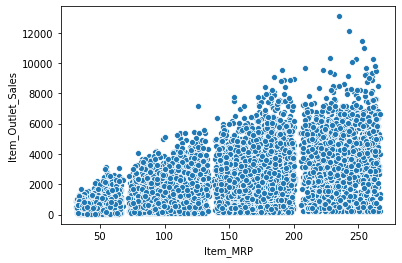

In [73]:
sns.scatterplot(data.Item_MRP, data.Item_Outlet_Sales)

In [74]:
data['Item_MRP_cat'] = pd.cut(data.Item_MRP, bins=[31,69,137,203,270], labels=['a','b','c','d'])

In [75]:
data.groupby(['Item_Type_Combined', 'Item_Type_New', 'Item_Type'])['Item_Outlet_Sales'].sum()

Item_Type_Combined  Item_Type_New   Item_Type            
Drinks              non_perishable  Hard Drinks              4.577934e+05
                                    Soft Drinks              8.928977e+05
                    perishable      Dairy                    2.451782e+05
Food                non_perishable  Baking Goods             1.265525e+06
                                    Canned                   1.444151e+06
                                    Frozen Foods             1.825735e+06
                    perishable      Breads                   5.532372e+05
                                    Breakfast                2.322990e+05
                                    Dairy                    1.277416e+06
                                    Fruits and Vegetables    2.820060e+06
                                    Meat                     9.175656e+05
                                    Seafood                  1.488682e+05
                                    Snack Foods       

In [76]:
data['MRP_per_unit_weight'] = data.Item_MRP/data.Item_Weight    

In [77]:
data['Outlet_Years'] = 2020 - data['Outlet_Establishment_Year']

In [78]:
data.Outlet_Establishment_Year = data.Outlet_Establishment_Year.astype('category')

In [79]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[3:5])

In [80]:
data.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Item_MRP_cat,MRP_per_unit_weight,Outlet_Years
0,15,Food,Dairy,Low Fat,9.30,0.014862,0.931078,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,d,26.861204,21
1,01,Drinks,Soft Drinks,Regular,5.92,0.017586,0.933420,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable,a,8.153581,11
2,15,Food,Meat,Low Fat,17.50,0.015470,0.960069,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,c,8.092457,21
3,07,Food,Fruits and Vegetables,Regular,19.20,0.000000,0.000000,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,perishable,c,9.484115,22
4,19,Non-Consumable,Household,Household,8.93,0.000000,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable,a,6.031512,33


In [81]:
data['Item_Visibility'], _ = stats.boxcox(data['Item_Visibility'] + 1)

In [82]:
data.corr()

,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Item_Outlet_Sales,MRP_per_unit_weight,Outlet_Years
Item_Weight,1.000000,-0.013779,-0.007305,0.033002,0.011083,-0.582756,-0.000462
Item_Visibility,-0.013779,1.000000,0.480356,0.000583,-0.097405,-0.005059,0.061647
Item_visiblity_avg,-0.007305,0.480356,1.000000,-0.000317,-0.247971,-0.013737,0.165874
Item_MRP,0.033002,0.000583,-0.000317,1.000000,0.567574,0.704480,-0.000141
Item_Outlet_Sales,0.011083,-0.097405,-0.247971,0.567574,1.000000,0.391377,0.049135
MRP_per_unit_weight,-0.582756,-0.005059,-0.013737,0.704480,0.391377,1.000000,-0.061074
Outlet_Years,-0.000462,0.061647,0.165874,-0.000141,0.049135,-0.061074,1.000000


In [83]:
data['Item_visiblity_avg'] = np.log(data['Item_visiblity_avg'] + 1)

Text(0.5, 1.0, 'Correlation between different attributes')

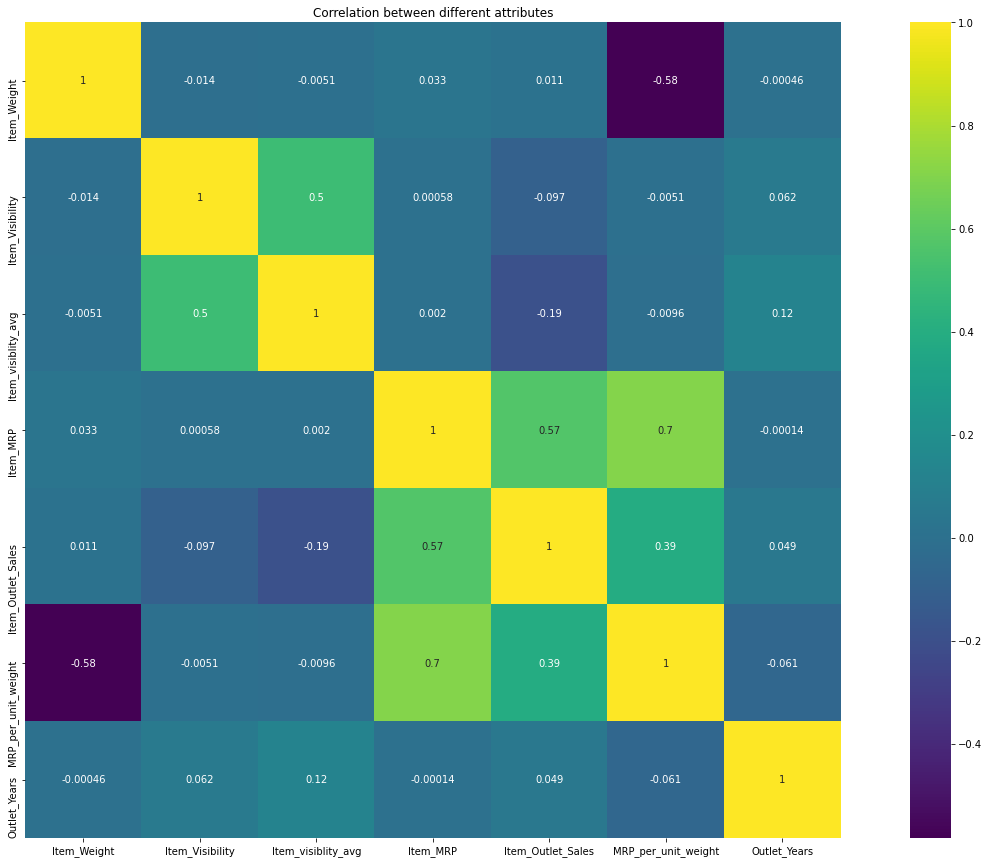

In [84]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation between different attributes")

In [98]:
df = data.copy()

# Seperating Train and test data

In [99]:
df_train = df.iloc[0:train.shape[0]]
df_test = df.iloc[train.shape[0]:]

In [100]:
print(df_train.shape,df_test.shape)

(8523, 18) (5681, 18)


Now we will do predict our data with get_dummies

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  object  
 1   Item_Type_Combined         14204 non-null  object  
 2   Item_Type                  14204 non-null  object  
 3   Item_Fat_Content           14204 non-null  object  
 4   Item_Weight                14204 non-null  float64 
 5   Item_Visibility            14204 non-null  float64 
 6   Item_visiblity_avg         14204 non-null  float64 
 7   Item_MRP                   14204 non-null  float64 
 8   Outlet_Identifier          14204 non-null  object  
 9   Outlet_Establishment_Year  14204 non-null  category
 10  Outlet_Size                14204 non-null  object  
 11  Outlet_Location_Type       14204 non-null  object  
 12  Outlet_Type                14204 non-null  object  
 13  Item_Outlet_Sales          8523

In [102]:
df_train.select_dtypes(include='float').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_visiblity_avg', 'Item_MRP',
       'Item_Outlet_Sales', 'MRP_per_unit_weight'],
      dtype='object')

In [103]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [104]:
df.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_New,Item_MRP_cat,MRP_per_unit_weight,Outlet_Years
0,14,1,4,1,9.30,0.014570,0.658078,249.8092,9,1999,1,0,1,3735.1380,2,3,26.861204,21
1,0,0,14,2,5.92,0.017178,0.659290,48.2692,3,2009,1,2,2,443.4228,1,0,8.153581,11
2,14,1,10,1,17.50,0.015154,0.672980,141.6180,9,1999,1,0,1,2097.2700,2,2,8.092457,21
3,6,1,6,2,19.20,0.000000,0.000000,182.0950,0,1998,2,2,0,732.3800,2,2,9.484115,22
4,18,2,9,0,8.93,0.000000,0.000000,53.8614,1,1987,0,2,1,994.7052,1,0,6.031512,33


In [122]:
df_train = pd.get_dummies(df_train)

In [123]:
df_train.corr()['Item_Outlet_Sales']

Item_Weight                          0.01108
Item_Visibility                     -0.09740
Item_visiblity_avg                  -0.18884
Item_MRP                             0.56757
Item_Outlet_Sales                    1.00000
MRP_per_unit_weight                  0.39138
Outlet_Years                         0.04913
Item_Identifier_01                  -0.00564
Item_Identifier_02                   0.00736
Item_Identifier_03                   0.00040
Item_Identifier_04                  -0.02477
Item_Identifier_05                   0.00644
Item_Identifier_06                   0.00443
Item_Identifier_07                  -0.01714
Item_Identifier_08                  -0.00829
Item_Identifier_09                  -0.00299
Item_Identifier_10                  -0.03370
Item_Identifier_11                   0.02217
Item_Identifier_12                  -0.01436
Item_Identifier_13                  -0.02104
Item_Identifier_14                  -0.02391
Item_Identifier_15                   0.00805
Item_Ident

In [94]:
df_train.head()

,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Item_Outlet_Sales,MRP_per_unit_weight,Outlet_Years,Item_Identifier_01,Item_Identifier_02,Item_Identifier_03,Item_Identifier_04,Item_Identifier_05,Item_Identifier_06,Item_Identifier_07,Item_Identifier_08,Item_Identifier_09,Item_Identifier_10,Item_Identifier_11,Item_Identifier_12,Item_Identifier_13,Item_Identifier_14,Item_Identifier_15,Item_Identifier_16,Item_Identifier_17,Item_Identifier_18,Item_Identifier_19,Item_Identifier_20,Item_Identifier_21,Item_Identifier_22,Item_Identifier_23,Item_Identifier_24,Item_Identifier_25,Item_Identifier_26,Item_Identifier_27,Item_Identifier_28,Item_Identifier_29,Item_Identifier_30,Item_Identifier_31,Item_Identifier_32,Item_Identifier_33,...,Item_Type_Starchy Foods,Item_Fat_Content_Household,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Not_Known,Item_Type_New_non_perishable,Item_Type_New_perishable,Item_MRP_cat_a,Item_MRP_cat_b,Item_MRP_cat_c,Item_MRP_cat_d
0,9.30,0.014570,0.658078,249.8092,3735.1380,26.861204,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
1,5.92,0.017178,0.659290,48.2692,443.4228,8.153581,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
2,17.50,0.015154,0.672980,141.6180,2097.2700,8.092457,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,19.20,0.000000,0.000000,182.0950,732.3800,9.484115,22,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
4,8.93,0.000000,0.000000,53.8614,994.7052,6.031512,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0


In [95]:
df_train.shape

(8523, 125)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 125 entries, Item_Weight to Item_MRP_cat_d
dtypes: float64(6), int64(1), uint8(118)
memory usage: 1.4 MB


In [124]:
df_x = df_train.drop(['Item_Outlet_Sales'], axis=1)
df_y = df_train['Item_Outlet_Sales']

In [125]:
x_train, x_test, y_train, y_test=train_test_split(df_x,df_y, train_size=0.8, random_state=10)

# Now Lets use Machine Learning Model and check which model works

In [112]:
lr = LinearRegression()
rfc = ensemble.RandomForestRegressor(n_estimators=400, bootstrap=True, min_samples_leaf=100, min_samples_split=8, max_depth=6)
ada = ensemble.AdaBoostRegressor(n_estimators=1000, learning_rate=0.01)
gbr = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5, min_samples_split=8, min_samples_leaf=100)
xgb = XGBRFRegressor(n_jobs=-1, n_estimators=1000, max_depth=5)
cat = CatBoostRegressor(verbose=0)
dtr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
knn = KNeighborsRegressor()
mlp = MLPRegressor()
svr = SVR(kernel='linear', C=10, gamma='scale')

from lightgbm import LGBMRegressor
lgbr = LGBMRegressor()

In [128]:
accuracy = {}
mse = {}
explained_variance = {}
max_error = {}

def train_model(model):
    if model == cat:
        print('CatBoostRegressor()')
        cat.fit(x_train,y_train)
        pred = cat.predict(x_test)
        
        acc = metrics.r2_score(y_test, pred)*100
        accuracy['CatBoostRegressor()'] = acc
        print('R2_Score',acc)
        
        met = np.sqrt(metrics.mean_squared_error(y_test, pred))
        print('RMSE : ', met)
        mse['CatBoostRegressor()'] = met
        
        var = np.sqrt(metrics.explained_variance_score(y_test, pred))
        print('Explained_Variance : ', var)
        explained_variance['CatBoostRegressor()'] = var
        
        error = np.sqrt(metrics.max_error(y_test, pred))
        print('Max_Error : ', error)
        max_error['CatBoostRegressor()'] = error

    elif model == xgb:
        print('XGBRFRegressor()')
        xgb.fit(x_train,y_train)
        pred = xgb.predict(x_test)
        
        acc = metrics.r2_score(y_test, pred)*100
        accuracy['XGBRFRegressor()'] = acc
        print('R2_Score',acc)
        
        met = np.sqrt(metrics.mean_squared_error(y_test, pred))
        print('RMSE : ', met)
        mse['XGBRFRegressor()'] = met
        
        var = np.sqrt(metrics.explained_variance_score(y_test, pred))
        print('Explained_Variance : ', var)
        explained_variance['XGBRFRegressor()'] = var
        
        error = np.sqrt(metrics.max_error(y_test, pred))
        print('Max_Error : ', error)
        max_error['XGBRFRegressor()'] = error
        
    elif model == rfc:
        print('RandomForestRegressor()')
        rfc.fit(x_train,y_train)
        pred = rfc.predict(x_test)
        
        acc = metrics.r2_score(y_test, pred)*100
        accuracy['RandomForestRegressor()'] = acc
        print('R2_Score',acc)
        
        met = np.sqrt(metrics.mean_squared_error(y_test, pred))
        print('RMSE : ', met)
        mse['RandomForestRegressor()'] = met
        
        
        var = np.sqrt(metrics.explained_variance_score(y_test, pred))
        print('Explained_Variance : ', var)
        explained_variance['RandomForestRegressor()'] = var
        
        error = np.sqrt(metrics.max_error(y_test, pred))
        print('Max_Error : ', error)
        max_error['RandomForestRegressor()'] = error
        
        
    else:
        print(model)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        acc = metrics.r2_score(y_test, pred)*100
        accuracy[model] = acc
        print('R2_Score',acc)
        
        met = np.sqrt(metrics.mean_squared_error(y_test, pred))
        print('RMSE : ', met)
        mse[model] = met
        
        var = np.sqrt(metrics.explained_variance_score(y_test, pred))
        print('Explained_Variance : ', var)
        explained_variance[model] = var
        
        error = np.sqrt(metrics.max_error(y_test, pred))
        print('Max_Error : ', error)
        max_error[model] = error

In [129]:
train_model(cat)

CatBoostRegressor()
R2_Score 57.87526992627774
RMSE :  1118.2287143590686
Explained_Variance :  0.7607708726514236
Max_Error :  81.04807638262525


In [130]:
train_model(svr)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2_Score 55.759280732175476
RMSE :  1145.969777311331
Explained_Variance :  0.7507644824976729
Max_Error :  92.15464794994418


In [131]:
train_model(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_Score 57.31746938995328
RMSE :  1125.6079577498485
Explained_Variance :  0.7571022889296127
Max_Error :  88.79437686306493


In [132]:
train_model(rfc)

RandomForestRegressor()
R2_Score 60.37615273149704
RMSE :  1084.5270662178114
Explained_Variance :  0.7772011225572646
Max_Error :  86.38710618847036


In [133]:
train_model(xgb)

XGBRFRegressor()
[05:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2_Score 60.067183942764736
RMSE :  1088.7471806335896
Explained_Variance :  0.7750967019497272
Max_Error :  86.3482199756819


In [134]:
train_model(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
                  n_estimators=1000, random_state=None)
R2_Score 57.31761418256177
RMSE :  1125.6060485395903
Explained_Variance :  0.7672355203608477
Max_Error :  86.30574774649135


In [135]:
train_model(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=100, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R2_Score 60.91740492869591
RMSE :  1077.0944077830097
Explained_Variance :  0.780617161181516
Max_Error :  87.11725672164596


In [136]:
train_model(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2_Score 59.4351862458014
RMSE :  1097.3289012601624
Explained_Variance :  0.7711172162919648
Max_Error :  85.12216225603564


In [137]:
train_model(mlp)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
R2_Score 59.080784800975636
RMSE :  1102.111977905733
Explained_Variance :  0.7686668673349984
Max_Error :  88.15348268231703


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [138]:
train_model(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
R2_Score 47.59181630222017
RMSE :  1247.2733093802758
Explained_Variance :  0.6908492276112904
Max_Error :  87.69638418999952


In [139]:
train_model(lgbr)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
R2_Score 58.907732955859075
RMSE :  1104.4399953059203
Explained_Variance :  0.7675573484947203
Max_Error :  86.37623198091802


<Figure size 36000x36000 with 0 Axes>

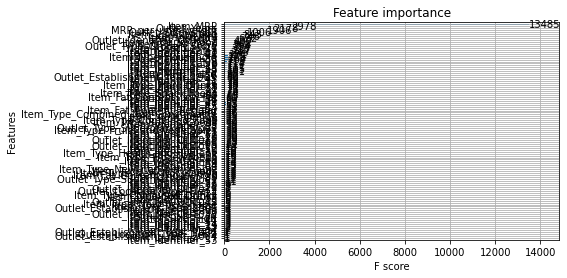

In [140]:
from xgboost import plot_importance
plt.figure(figsize=(500,500))
plot_importance(xgb)
plt.show()

In [ ]:
from sklearn import linear_model

In [ ]:
en = linear_model.ElasticNet()
train_model(en)

In [ ]:
llm = linear_model.Lasso()
train_model(llm)

In [ ]:
rlm = linear_model.TweedieRegressor()
train_model(rlm)

# Visualising our Output

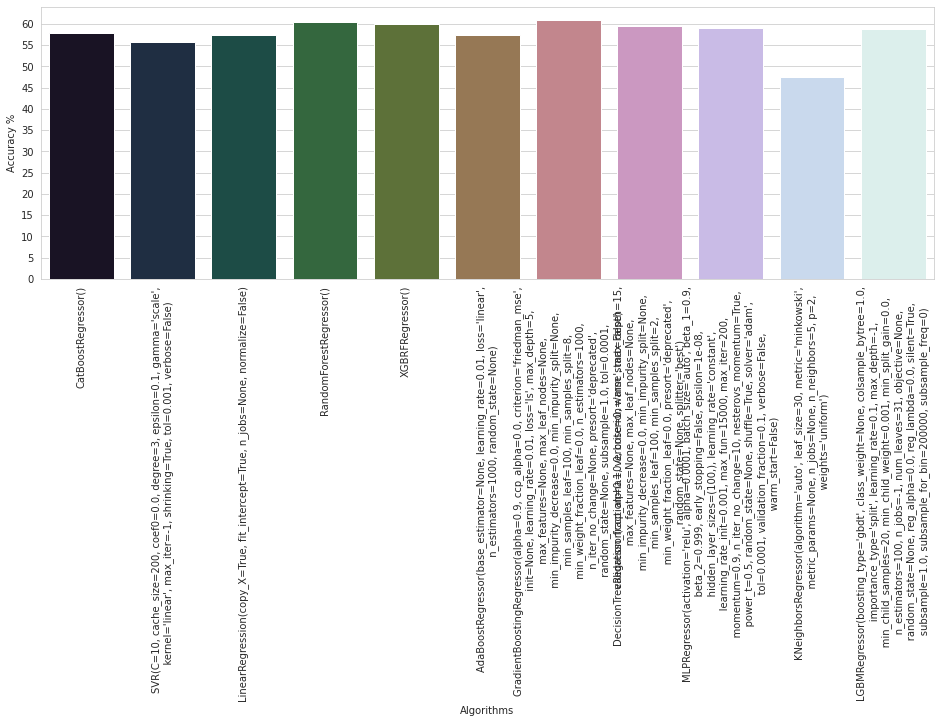

In [142]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,110,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="cubehelix")
plt.show()

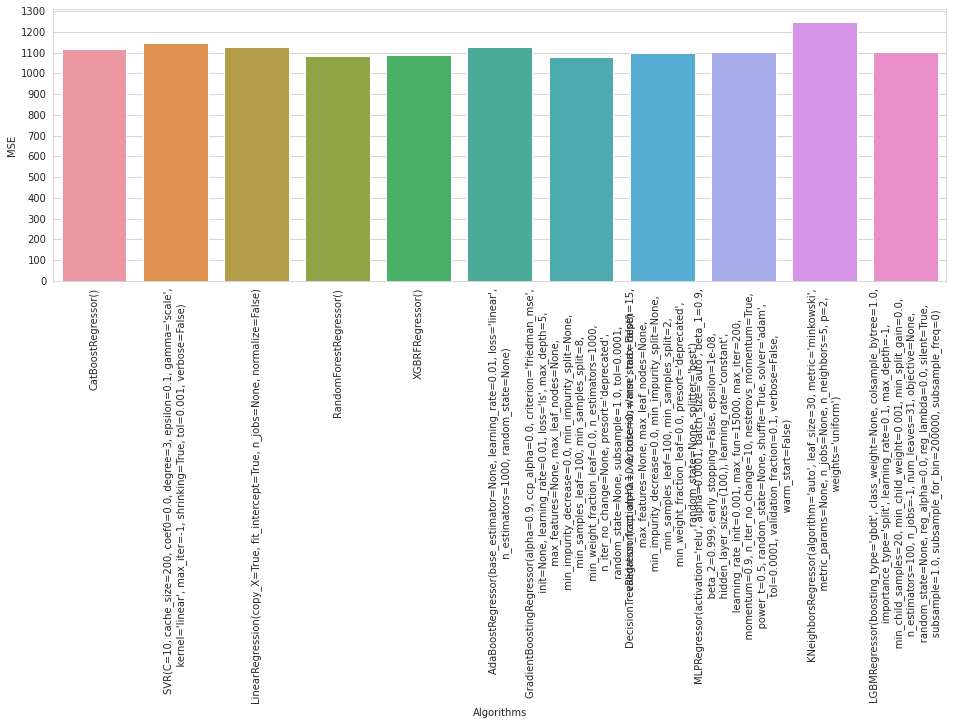

In [143]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1600,100))
plt.ylabel("MSE")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(mse.keys()), y=list(mse.values()))
plt.show()

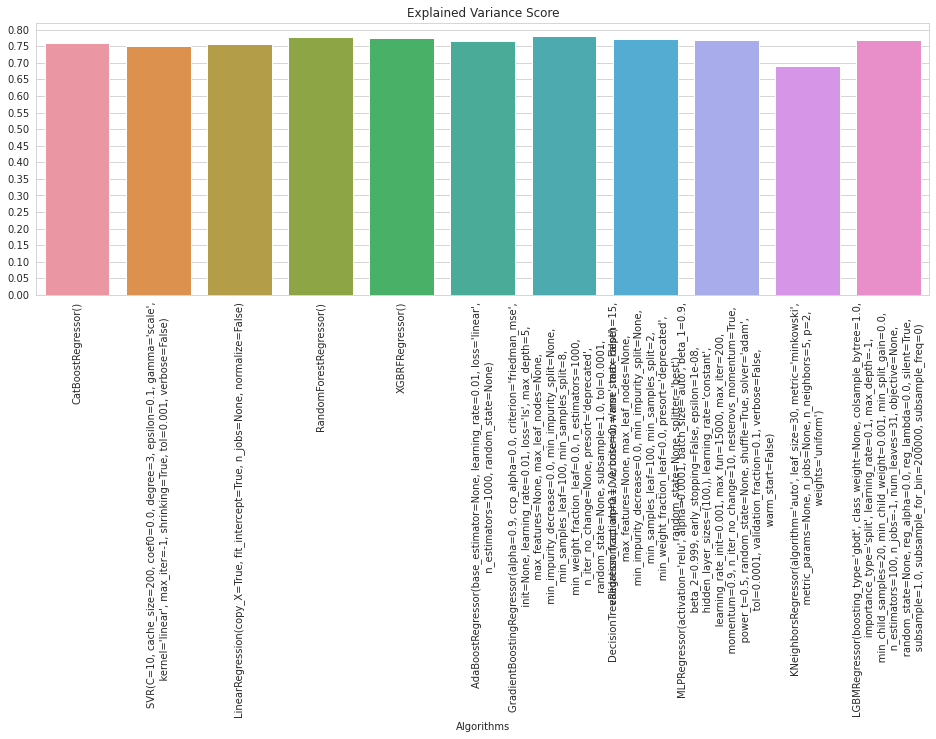

In [144]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1,0.05))
plt.title("Explained Variance Score")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(explained_variance.keys()), y=list(explained_variance.values()))
plt.show()

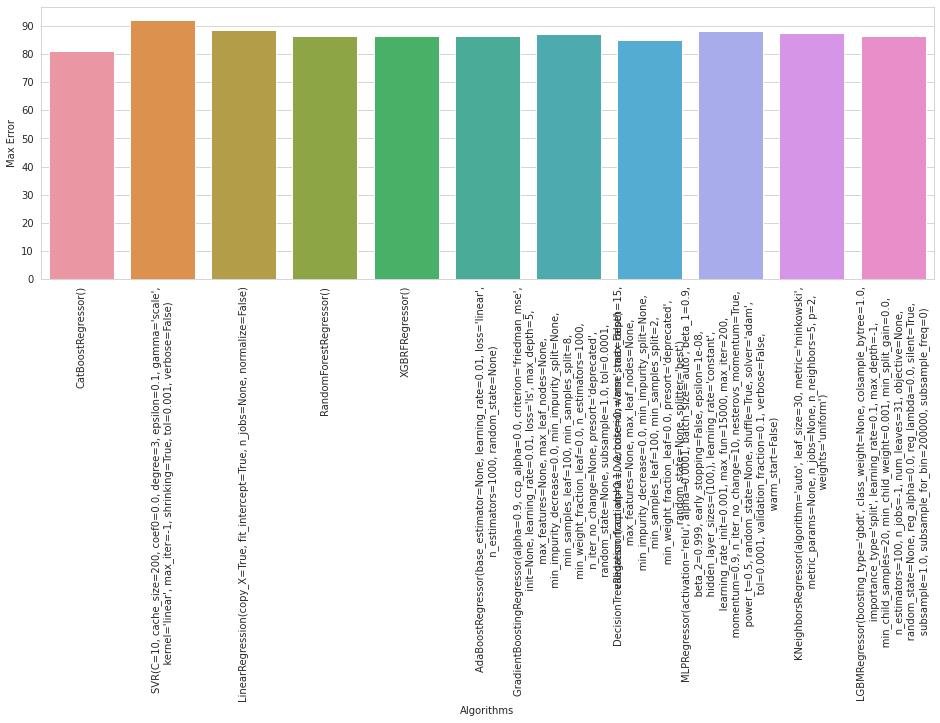

In [145]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Max Error")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(max_error.keys()), y=list(max_error.values()))
plt.show()

# Lets Do HyperParameter Tuning

We will use Gradient Boosting Regressor because we get less error with this method and more accuracy

In [146]:
'''    
param = dict(learning_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
            n_estimators = [1000, 800, 900, 1200, 1500, 1800, 2000],
            max_depth = [5, 6, 7, 8, 9, 10, 12, 15],
            min_samples_split = [7, 8, 9, 10, 12, 15],
            min_samples_leaf = [100, 150, 80, 120, 180, 200])

rs = GridSearchCV(gbr, param, n_jobs=-1, cv=2, verbose=3)

rs.fit(df_x, df_y)

rs.best_score_*100'''

'''
best_estimator = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_leaf=200,
                          min_samples_split=7, n_estimators=1000)'''

'\nbest_estimator = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_leaf=200,\n                          min_samples_split=7, n_estimators=1000)'

In [147]:
gbr_1 = ensemble.GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_leaf=200,
                          min_samples_split=7, n_estimators=1000)

> New Accuracy is a little bit higher "61.408286503156515"
Lets use it for our New Prediction

In [148]:
gbr_1.fit(df_x, df_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=200, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Now Let's predict Sales

In [149]:
df_test.drop(['Item_Outlet_Sales'], axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [150]:
df_test.shape

(5681, 17)

In [151]:
df_test_ = pd.get_dummies(df_test)
df_test_.reset_index(drop=True, inplace=True)

In [152]:
df_test['Item_Outlet_Sales'] = gbr_1.predict(df_test_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
df_test.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_visiblity_avg,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New,Item_MRP_cat,MRP_per_unit_weight,Outlet_Years,Item_Outlet_Sales
0,58,Food,Snack Foods,Low Fat,20.75000,0.00722,0.70764,107.86220,OUT049,1999,Medium,Tier 1,Supermarket Type1,perishable,b,5.19818,21,1531.87642
1,14,Food,Dairy,Regular,8.30000,0.03079,0.75627,87.31980,OUT017,2007,High,Tier 2,Supermarket Type1,perishable,b,10.52046,13,1356.79257
2,55,Non-Consumable,Others,Household,14.60000,0.05931,1.00621,241.75380,OUT010,1998,Small,Tier 3,Grocery Store,Not_Known,d,16.55848,22,577.10148
3,58,Food,Snack Foods,Low Fat,7.31500,0.01403,0.82924,155.03400,OUT017,2007,High,Tier 2,Supermarket Type1,perishable,c,21.19398,13,2451.82767
4,38,Food,Dairy,Regular,12.79285,0.06513,0.65119,234.23000,OUT027,1985,High,Tier 3,Supermarket Type3,perishable,d,18.30944,35,5791.77800


In [154]:
df_test.to_csv('Predicted_sales.csv', index=None)

In [155]:
submission = ['Item_Type_Combined','Outlet_Identifier','Item_Outlet_Sales']

In [156]:
submission = df_test[submission]
submission.head()

,Item_Type_Combined,Outlet_Identifier,Item_Outlet_Sales
0,Food,OUT049,1531.87642
1,Food,OUT017,1356.79257
2,Non-Consumable,OUT010,577.10148
3,Food,OUT017,2451.82767
4,Food,OUT027,5791.77800


In [157]:
submission.to_csv('submission.csv', index=None)